In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datasets 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, log_loss
from baseline_datamodules import LABEL_ORDER, LABEL_ORDER_DICT

from galaxy_datasets.shared import label_metadata


In [26]:
def load_test_preds(test_preds_loc):
    df = pd.read_csv(test_preds_loc)
    test_dataset = datasets.load_dataset("mwalmsley/gz_evo", name='default', split='test')
    test_dataset = test_dataset.remove_columns("image")
    test_dataset.set_format('pandas')
    df = pd.merge(test_dataset.data.to_pandas(), df, on='id_str', how='inner', validate='1:1', suffixes=('_vol', '_ml'))
    return df

In [27]:
def get_overall_metrics(df):

    index_labels = df['summary'].map(LABEL_ORDER_DICT)
    # onehot_labels = pd.get_dummies(df['summary']).astype(float).values

    df['pred_sum'] = df[LABEL_ORDER].sum(axis=1)
    df['pred_sum_near_one'] = df['pred_sum'].apply(lambda x: np.isclose(x, 1.0))
    print(df['pred_sum'].mean())
    assert df['pred_sum_near_one'].all(), "Predictions do not sum to 1.0"

    predictions = df[LABEL_ORDER].values



    # accuracy = accuracy_score(index_labels, predictions)
    accuracy = accuracy_score(index_labels, np.argmax(predictions, axis=1))

    crossentropy = log_loss(index_labels, predictions)

    return {
        'accuracy': accuracy,
        'crossentropy': crossentropy
    }

In [28]:
    # onehot_labels = pd.get_dummies(df['summary']).astype(float).values
    # predictions = df[LABEL_ORDER].values

In [29]:
# onehot_labels

In [30]:
# predictions

In [31]:
# local_dir = '/home/walml/repos/gz-evo/results/baselines/classification/'
results_dir = '/Users/user/repos/gz-evo/results/baselines/classification/'

In [32]:
results = []
for dataset_name, architecture_name, checkpoint_dir in [
    ('gz_evo', 'tf_efficientnetv2_s',  results_dir + 'tf_efficientnetv2_s_534895718'),
    ('gz_evo', 'maxvit_base',  results_dir + 'maxvit_base_534895718'),
    ('gz_evo', 'convnext_base',  results_dir + 'convnext_base_534895718'),
    ('gz_evo', 'convnext_base',  results_dir + 'convnext_base_finetune_494155588'),
    ('gz_evo', 'convnext_nano',  results_dir + 'convnext_nano_534895718'),  # suspicious but repeats
    # ('gz_evo', 'convnext_nano',  results_dir + 'convnext_nano_finetune_494155588'),  failed
    ('gz_evo', 'maxvit_tiny_rw_224',  results_dir + 'maxvit_tiny_rw_224_534895718'),
    ('gz_evo', 'resnet50',  results_dir + 'resnet50_534895718'),
    # ('gz_evo', 'convnextv2_base.fcmae_ft_in22k_in1k',  results_dir + 'convnextv2_base.fcmae_ft_in22k_in1k_534895718')
    # new
    ('gz_evo', 'convnext_large', results_dir + 'convnext_large_534895718'),
    ('gz_evo', 'maxvit_large', results_dir + 'maxvit_large_534895718'),
    ('gz_evo', 'maxvit_small', results_dir + 'maxvit_small_3966912'),
    ('gz_evo', 'tf_efficientnetv2_l', results_dir + 'tf_efficientnetv2_l_534895718'),
    ('gz_evo', 'tf_efficientnetv2_m', results_dir + 'tf_efficientnetv2_m_534895718'),

]:
    print(architecture_name)
    df = load_test_preds(checkpoint_dir + '/test_predictions.csv')
    metrics = get_overall_metrics(df)
    results.append({
        'architecture_name': architecture_name,
        'checkpoint_dir': os.path.basename(checkpoint_dir),
        'accuracy': metrics['accuracy'],
        'crossentropy': metrics['crossentropy'],
        'balanced_accuracy': balanced_accuracy_score(df['summary'].map(LABEL_ORDER_DICT), np.argmax(df[LABEL_ORDER].values, axis=1))
    })
results_df = pd.DataFrame(results)
    

tf_efficientnetv2_s
gz_evo
1.0000000144595307
maxvit_base


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
0.9999999996350782
convnext_base


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.0000000239446454
convnext_base


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.000000045197906
convnext_nano


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.000000008655394
maxvit_tiny_rw_224


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.0000000082347658
resnet50


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.0000000003372571
convnext_large


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.0000000084212455
maxvit_large


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.00000000269627
maxvit_small


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.0000000068405164
tf_efficientnetv2_l


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.0000000014222423
tf_efficientnetv2_m


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


gz_evo
1.000000004677652


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [33]:
df = load_test_preds(checkpoint_dir + '/test_predictions.csv')
# df[LABEL_ORDER].iloc[0].values
# df[LABEL_ORDER].iloc[0].sum()
df['pred_sum'] = df[LABEL_ORDER].sum(axis=1)
df['pred_sum_near_one'] = df['pred_sum'].apply(lambda x: np.isclose(x, 1.0))
df['pred_sum_near_one'].mean()

gz_evo


1.0

In [34]:
results_df.sort_values('crossentropy')  # 8869

,architecture_name,checkpoint_dir,accuracy,crossentropy,balanced_accuracy
0,tf_efficientnetv2_s,tf_efficientnetv2_s_534895718,0.930564,0.622263,0.810077
10,tf_efficientnetv2_l,tf_efficientnetv2_l_534895718,0.925886,0.623719,0.798916
3,convnext_base,convnext_base_finetune_494155588,0.930047,0.671865,0.813755
11,tf_efficientnetv2_m,tf_efficientnetv2_m_534895718,0.922006,0.683719,0.783527
2,convnext_base,convnext_base_534895718,0.930219,0.686380,0.818329
5,maxvit_tiny_rw_224,maxvit_tiny_rw_224_534895718,0.927524,0.763946,0.804245
9,maxvit_small,maxvit_small_3966912,0.926058,0.783621,0.802943
8,maxvit_large,maxvit_large_534895718,0.892925,0.920840,0.618772
1,maxvit_base,maxvit_base_534895718,0.901354,0.923687,0.695558
6,resnet50,resnet50_534895718,0.887212,1.196139,0.615447


In [41]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(df[LABEL_ORDER], df['summary'])
dummy.score(df[LABEL_ORDER], df['summary'])

0.5286927653703544

In [36]:

model_names = {
    'convnext_pico': 'ConvNeXt-Pico',
    'convnext_base': 'ConvNeXt-Base',
    'maxvit_tiny_rw_224': 'MaxViT Tiny',
    'tf_efficientnetv2_s': 'EfficientNetV2 S',
    'resnet50': 'ResNet50',
}
results_df['model_name'] = results_df['architecture_name'].map(model_names)

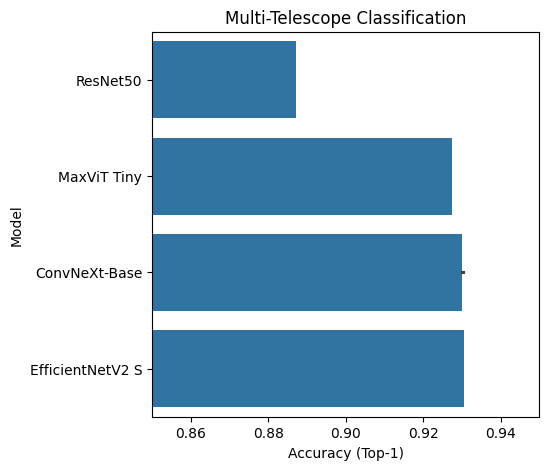

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=results_df.sort_values('accuracy'), x='accuracy', y='model_name', ax=ax)
ax.set_xlim(0.85, .95)
ax.set_xlabel('Accuracy (Top-1)')
ax.set_ylabel('Model')
ax.set_title('Multi-Telescope Classification')
fig.savefig('classification_overall.png', dpi=300)
fig.savefig('classification_overall.pdf', dpi=300)


Text(0.5, 1.0, 'Multi-Telescope Classification')

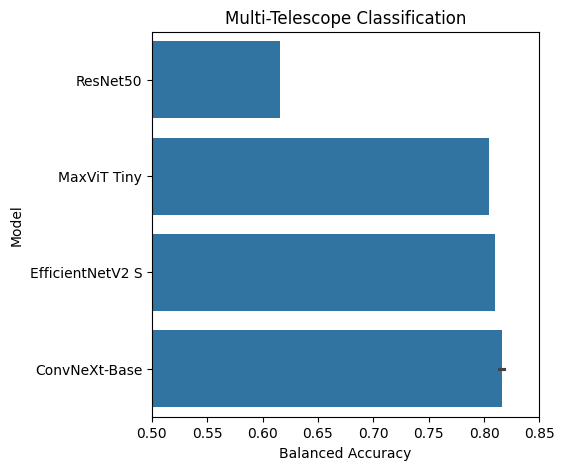

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=results_df.sort_values('balanced_accuracy'), x='balanced_accuracy', y='model_name', ax=ax)
ax.set_xlim(0.5, .85)
ax.set_xlabel('Balanced Accuracy')
ax.set_ylabel('Model')
ax.set_title('Multi-Telescope Classification')
# fig.savefig('classification_overall.png', dpi=300)
# fig.savefig('classification_overall.pdf', dpi=300)


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['summary'].map(LABEL_ORDER_DICT), np.argmax(df[LABEL_ORDER].values, axis=1))

cm

array([[24205,     4,   252,     4,    24,    36],
       [    9,  7636,    38,   314,     8,    12],
       [  269,    65,  6614,    32,   331,   142],
       [   10,   552,    40,  2309,     7,    15],
       [   66,    10,   790,     6,  1547,    37],
       [   79,    25,   369,    15,    57,   459]])

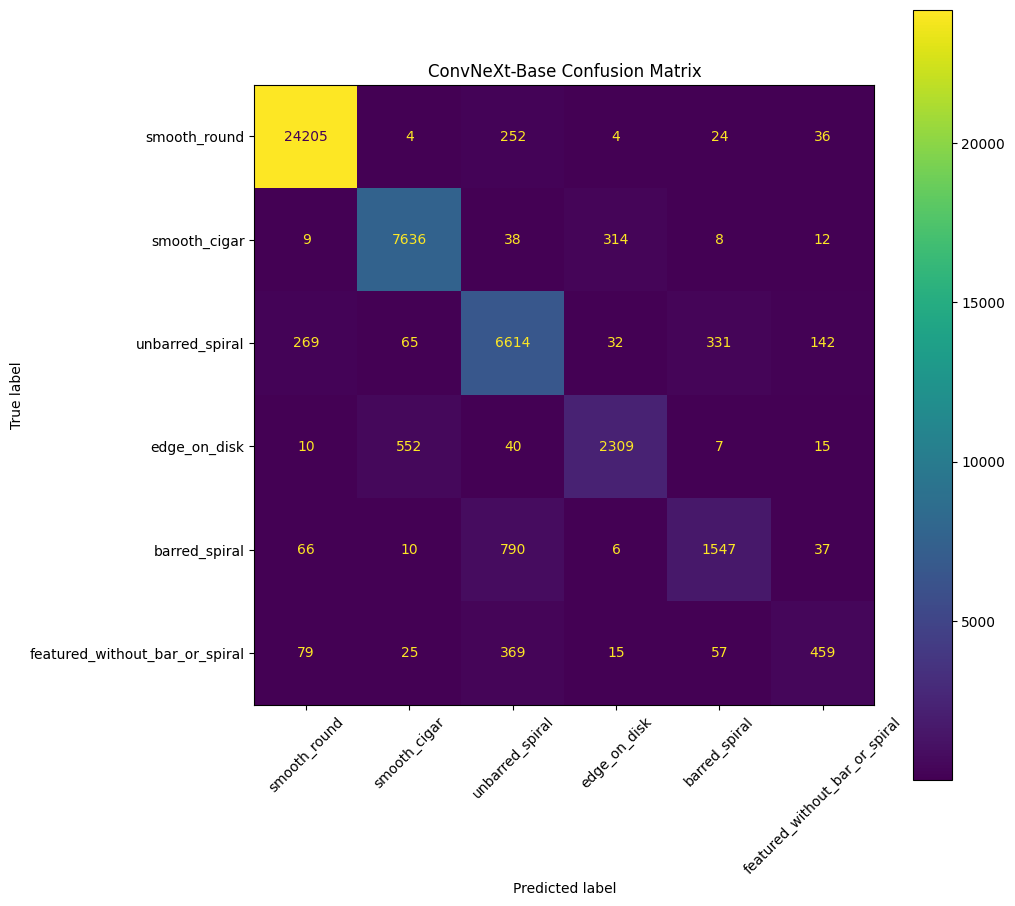

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ConfusionMatrixDisplay(cm, display_labels=LABEL_ORDER).plot(xticks_rotation=45, values_format='d', ax=ax)
ax.set_title('ConvNeXt-Base Confusion Matrix')
fig.savefig('classification_confusion_matrix.png', dpi=300)
fig.savefig('classification_confusion_matrix.pdf', dpi=300)